### Please Click <a href="https://scikit-learn.org/stable/modules/linear_model.html#lars-lasso">LassoLears</a> For more description

In [1]:
from sklearn.linear_model import LassoLars

In [2]:
lasso_regression = LassoLars(alpha=0.1)
lasso_regression.fit([[0, 0], [1, 1], [2, 2]], [0, 1, 2])

LassoLars(alpha=0.1, copy_X=True, eps=2.220446049250313e-16, fit_intercept=True,
          fit_path=True, max_iter=500, normalize=True, positive=False,
          precompute='auto', verbose=False)

In [3]:
lasso_regression.coef_

array([0.78786797, 0.        ])

In [4]:
lasso_regression.intercept_

0.21213203435596417

### For further details please visit this link <a href="https://www.quora.com/What-is-Least-Angle-Regression-and-when-should-it-be-used"> What is Lars(Least Angle Regression) and when should it be used? </a> 
And read this paper for full understanding about Lars 
<a href="https://web.stanford.edu/~hastie/Papers/LARS/LeastAngle_2002.pdf"> Lars</a>

###  <a href="https://scikit-learn.org/stable/modules/linear_model.html#orthogonal-matching-pursuit-omp">Orthogonal Matching pussuit (OMP) </a>

### 
Orthogonal Matching Pursuit Algorithm (OMP) is a greedy compressed sensing recovery algorithm which selects the best fitting column of the sensing matrix in each iteration. A least squares (LS) optimization is then performed in the subspace spanned by all previously picked columns. This method is less accurate than the Basis pursuit algorithms but has a lower computational complexity. The Matlab function has three inputs: Sparsity K, measurements vector y and sensing matrix A. The output of this function is the recovered sparse vector x.[Source : <a href="https://www.mathworks.com/matlabcentral/fileexchange/50584-orthogonal-matching-pursuit-algorithm-omp">Math Works</a>]

Automatically created module for IPython interactive environment


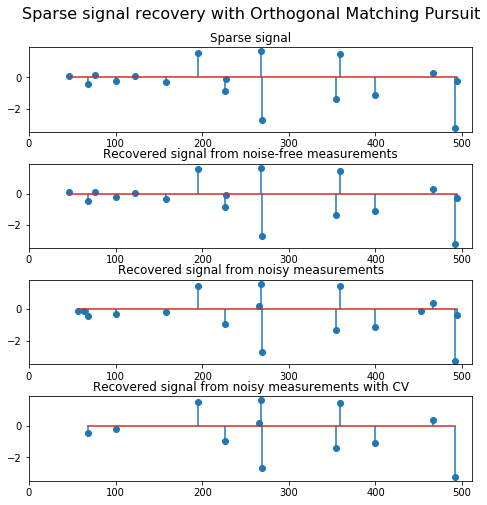

In [5]:
print(__doc__)

import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.linear_model import OrthogonalMatchingPursuitCV
from sklearn.datasets import make_sparse_coded_signal

n_components, n_features = 512, 100
n_nonzero_coefs = 17

# generate the data

# y = Xw
# |x|_0 = n_nonzero_coefs

y, X, w = make_sparse_coded_signal(n_samples=1,
                                   n_components=n_components,
                                   n_features=n_features,
                                   n_nonzero_coefs=n_nonzero_coefs,
                                   random_state=0)

idx, = w.nonzero()

# distort the clean signal
y_noisy = y + 0.05 * np.random.randn(len(y))

# plot the sparse signal
plt.figure(figsize=(7, 7))
plt.subplot(4, 1, 1)
plt.xlim(0, 512)
plt.title("Sparse signal")
plt.stem(idx, w[idx], use_line_collection=True)

# plot the noise-free reconstruction
omp = OrthogonalMatchingPursuit(n_nonzero_coefs=n_nonzero_coefs)
omp.fit(X, y)
coef = omp.coef_
idx_r, = coef.nonzero()
plt.subplot(4, 1, 2)
plt.xlim(0, 512)
plt.title("Recovered signal from noise-free measurements")
plt.stem(idx_r, coef[idx_r], use_line_collection=True)

# plot the noisy reconstruction
omp.fit(X, y_noisy)
coef = omp.coef_
idx_r, = coef.nonzero()
plt.subplot(4, 1, 3)
plt.xlim(0, 512)
plt.title("Recovered signal from noisy measurements")
plt.stem(idx_r, coef[idx_r], use_line_collection=True)

# plot the noisy reconstruction with number of non-zeros set by CV
omp_cv = OrthogonalMatchingPursuitCV()
omp_cv.fit(X, y_noisy)
coef = omp_cv.coef_
idx_r, = coef.nonzero()
plt.subplot(4, 1, 4)
plt.xlim(0, 512)
plt.title("Recovered signal from noisy measurements with CV")
plt.stem(idx_r, coef[idx_r], use_line_collection=True)

plt.subplots_adjust(0.06, 0.04, 0.94, 0.90, 0.20, 0.38)
plt.suptitle('Sparse signal recovery with Orthogonal Matching Pursuit',
             fontsize=16)
plt.show()

### <a href="https://scikit-learn.org/stable/modules/linear_model.html#bayesian-regression">Bayesian Regression </a>

In [6]:
from sklearn.linear_model import BayesianRidge

In [7]:
X = [[0., 0.], [1., 1.], [2., 2.], [3., 3.],[4., 4.], [5., 5.]]
y = [0., 1., 2.,3., 4., 5]

In [8]:
bayesian_regression = BayesianRidge()
bayesian_regression.fit(X, y)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

In [16]:
bayesian_regression.predict([[5., 2.]])

array([3.49999998])

In [17]:
bayesian_regression.coef_

array([0.49999999, 0.49999999])

In [19]:
print(__doc__)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import BayesianRidge, LinearRegression
from scipy import  stats

Automatically created module for IPython interactive environment


In [20]:
np.random.seed(0)
n_samples, n_features = 100, 100
X = np.random.randn(n_samples, n_features)
lambda_ = 4.
w = np.zeros(n_features)
relevant_features = np.random.randint(0, n_features, 10)

In [22]:
for i in relevant_features:
    w[i] = stats.norm.rvs(loc=0, scale = 1./np.sqrt(lambda_))

alpha_ = 50.
noise = stats.norm.rvs(loc = 0, scale= 1./np.sqrt(alpha_),size = n_samples)
y = np.dot(X, w) + noise

clf = BayesianRidge(compute_score=True)
clf.fit(X, y)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None, compute_score=True,
              copy_X=True, fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06,
              lambda_init=None, n_iter=300, normalize=False, tol=0.001,
              verbose=False)

In [23]:
ols = LinearRegression()
ols.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

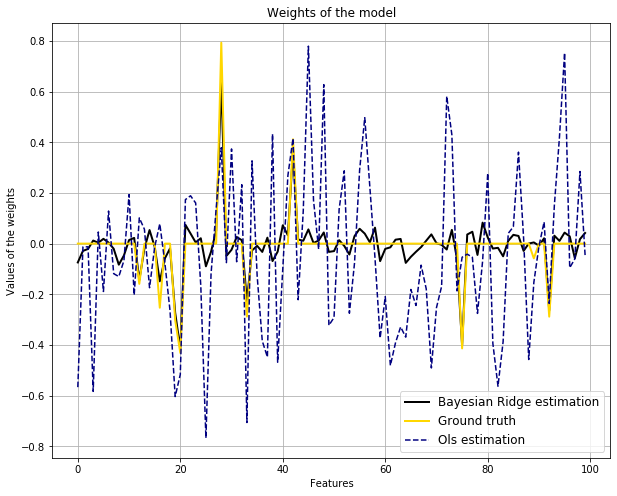

In [34]:
lw = 2
plt.figure(figsize=(10, 8))
plt.title("Weights of the model")
plt.plot(clf.coef_, color = 'black', linewidth = lw,
        label = "Bayesian Ridge estimation")
plt.plot(w, color = 'gold', linewidth = lw, label = 'Ground truth')
plt.plot(ols.coef_, color = 'navy', linestyle = '--',label = 'Ols estimation')
plt.xlabel('Features')
plt.ylabel("Values of the weights")
plt.legend(loc = 'best', prop = dict(size= 12))
plt.grid(True)
plt.show()

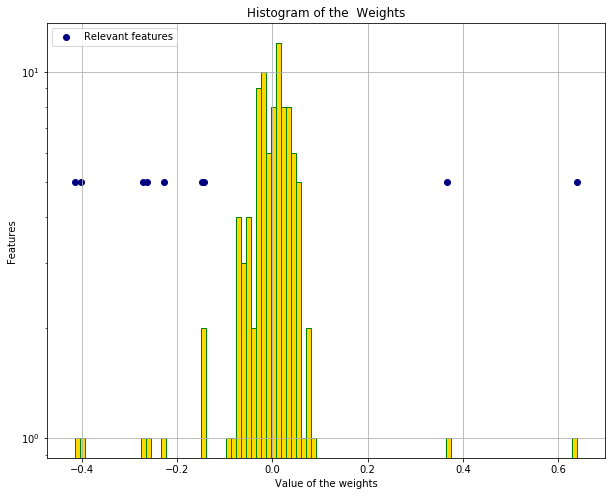

In [38]:
plt.figure(figsize=(10, 8))
plt.title("Histogram of the  Weights")
plt.hist(clf.coef_, bins = n_features, color = 'gold', log = True,
        edgecolor = 'green')
plt.scatter(clf.coef_[relevant_features], np.full(len(relevant_features), 5.),
            color='navy', label="Relevant features")
plt.ylabel("Features")
plt.xlabel("Value of the weights")
plt.legend(loc = 'upper left')
plt.grid(True)
plt.show()

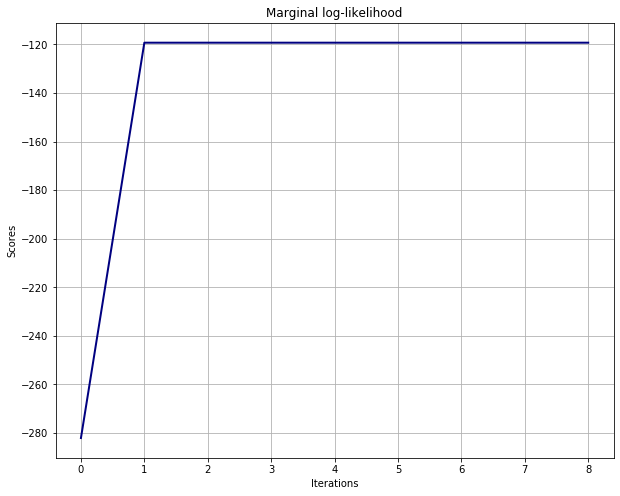

In [40]:
plt.figure(figsize=(10, 8))
plt.title("Marginal log-likelihood")
plt.plot(clf.scores_, color = 'navy', linewidth = lw)
plt.ylabel("Scores")
plt.xlabel("Iterations")
plt.grid(True)
plt.show()

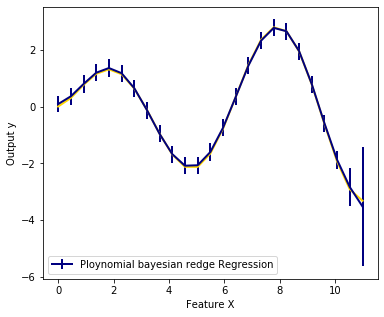

In [42]:
def f(x, noise_amount):
    y = np.sqrt(x) * np.sin(x)
    noise = np.random.normal(0, 1, len(x))
    return y+noise_amount * noise

degree = 10
X= np.linspace(0, 10, 100)
y= f(X, noise_amount=0.1)
clf_poly = BayesianRidge()
clf_poly.fit(np.vander(X, degree), y)

X_plot = np.linspace(0, 11, 25)
y_plot = f(X_plot, noise_amount=0)
y_mean, y_std = clf_poly.predict(np.vander(X_plot, degree), return_std = True)
plt.figure(figsize=(6, 5))
plt.errorbar(X_plot, y_mean, y_std, color = 'navy',
            label = 'Ploynomial bayesian redge Regression', linewidth=lw)
plt.plot(X_plot, y_plot, color = 'gold', linewidth = lw)
plt.ylabel('Output y')
plt.xlabel('Feature X')
plt.legend(loc = 'lower left')
plt.show()



